In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

dataset, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset["train"], dataset["test"]

class_names = metadata.features["label"].names
print("Class names: {}".format(class_names))

num_train_examples = metadata.splits["train"].num_examples
num_test_examples = metadata.splits["test"].num_examples
print(num_train_examples, num_test_examples)


def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels


train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()



2021-09-18 14:38:01.635236: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
60000 10000


2021-09-18 14:38:02.724979: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-18 14:38:02.725432: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-18 14:38:02.750746: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2021-09-18 14:38:02.750817: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: aolei-Nitro-N50-610
2021-09-18 14:38:02.750833: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: aolei-Nitro-N50-610
2021-09-18 14:38:02.750959: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.63.1
2021-09-18 14:38:02.751009: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.63.1
2021-09-18 14:38:02.751023: I tensorflow/stream_executor/cuda/

2021-09-18 14:38:02.827627: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-18 14:38:02.848096: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2899885000 Hz
2021-09-18 14:38:02.863336: W tensorflow/core/kernels/data/cache_dataset_ops.cc:757] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2021-09-18 14:38:02.863378: W tensorflow/core/kernels/data/cache_dataset_ops.cc:757] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an inp

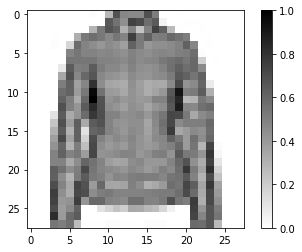

In [2]:
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

2021-09-18 14:38:03.377732: W tensorflow/core/kernels/data/cache_dataset_ops.cc:757] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2021-09-18 14:38:03.377816: W tensorflow/core/kernels/data/cache_dataset_ops.cc:757] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


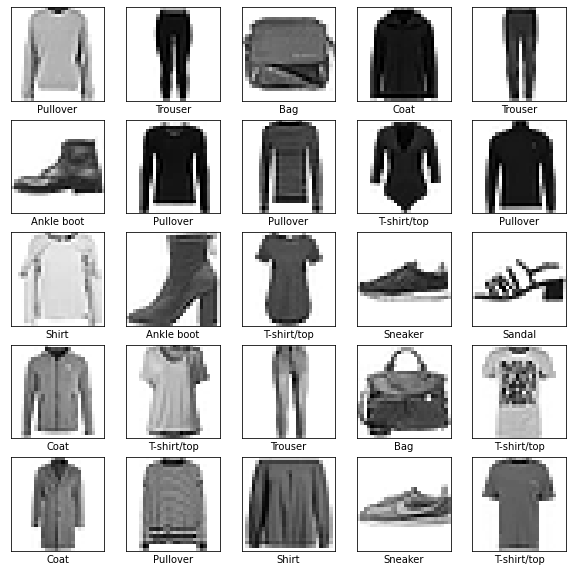

In [3]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28,1]),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [5]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [6]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [7]:
model.fit(train_dataset, epochs=30, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/30
1875/1875 [==============================] - 3s 778us/step - loss: 1.7645 - accuracy: 0.7100
Epoch 2/30
1875/1875 [==============================] - 1s 765us/step - loss: 1.6736 - accuracy: 0.7899
Epoch 3/30
1875/1875 [==============================] - 1s 751us/step - loss: 1.6686 - accuracy: 0.7936
Epoch 4/30
1875/1875 [==============================] - 1s 778us/step - loss: 1.6361 - accuracy: 0.8267
Epoch 5/30
1875/1875 [==============================] - 1s 764us/step - loss: 1.5942 - accuracy: 0.8676
Epoch 6/30
1875/1875 [==============================] - 1s 774us/step - loss: 1.5903 - accuracy: 0.8719
Epoch 7/30
1875/1875 [==============================] - 1s 742us/step - loss: 1.5837 - accuracy: 0.8790
Epoch 8/30
1875/1875 [==============================] - 1s 769us/step - loss: 1.5815 - accuracy: 0.8808
Epoch 9/30
1875/1875 [==============================] - 1s 746us/step - loss: 1.5765 - accuracy: 0.8864
Epoch 10/30
1875/1875 [==============================] - 1s 737u

In [8]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=num_test_examples/32)

312/312 [==============================] - 0s 1ms/step - loss: 1.5857 - accuracy: 0.8743


In [9]:
print("Accuracy on test dataset: ", test_accuracy)

Accuracy on test dataset:  0.8743000030517578


In [10]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [11]:
predictions.shape

(32, 10)

In [12]:
predictions[0]

array([6.64345490e-28, 2.98386114e-26, 1.44924095e-16, 1.21694752e-24,
       1.00000000e+00, 1.95699440e-30, 1.12874605e-11, 1.21826008e-27,
       1.40930095e-23, 1.29122355e-27], dtype=float32)

In [13]:
test_labels[0]

4

In [14]:
np.argmax(predictions[0])

4

In [15]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[...,0], cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    color = "blue" if predicted_label == true_label else "red"
    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100 * np.max(predictions_array),
        class_names[true_label]
    ))

In [16]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.xticks(range(10))
    plt.yticks([])
    plt.grid(False)
    thisplot = plt.bar(range(10),predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

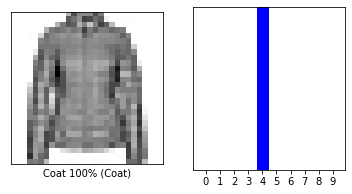

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

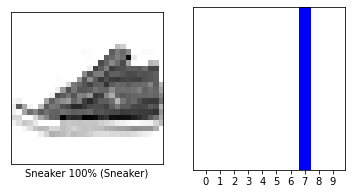

In [18]:
i = 30
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

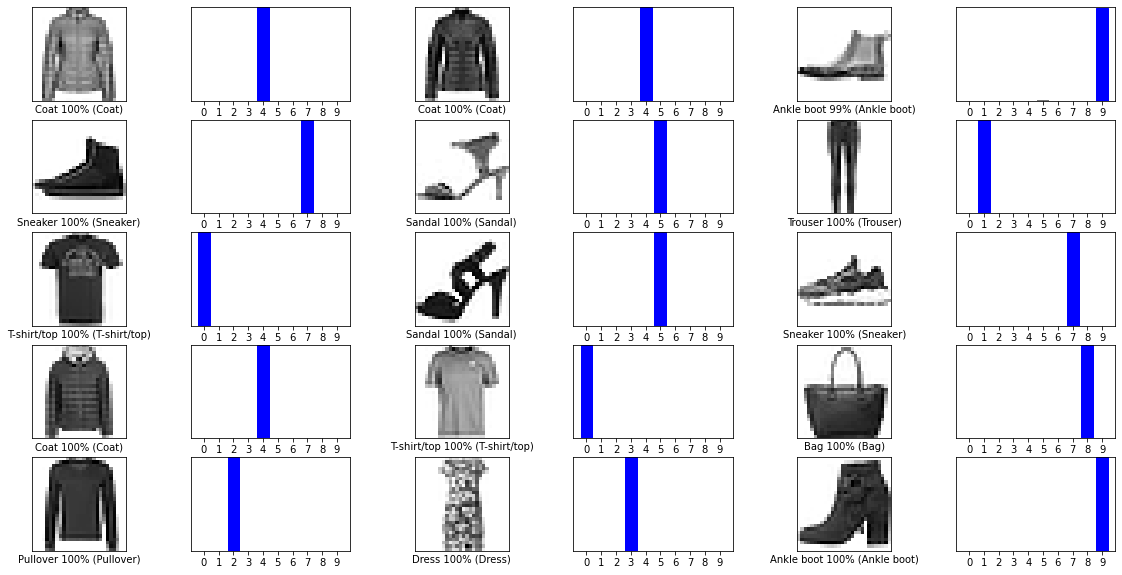

In [19]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_rows, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2* num_cols, 2*i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2* num_cols, 2*i + 2)
    plot_value_array(i, predictions, test_labels)

In [20]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding="same", activation=tf.nn.relu, input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [21]:
cnn_model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [22]:
cnn_model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.8164 - accuracy: 0.6444
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.6516 - accuracy: 0.8098
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.6363 - accuracy: 0.8249
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.6157 - accuracy: 0.8458
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.5602 - accuracy: 0.9012
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.5545 - accuracy: 0.9068
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.5489 - accuracy: 0.9122
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.5440 - accuracy: 0.9180
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.5410 - accuracy: 0.9200
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [23]:
test_loss, test_accuracy = cnn_model.evaluate(test_dataset, steps=num_test_examples/32)

312/312 [==============================] - 1s 2ms/step - loss: 1.5558 - accuracy: 0.9050
